In [1]:
print("Hello")

Hello


In [1]:
from ultralytics import YOLO

In [3]:
model = YOLO('yolov5m.pt')

PRO TIP  Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100%|██████████| 48.2M/48.2M [02:08<00:00, 393kB/s] 


In [4]:
model.train(data="./datasets/coco/data.yaml", epochs = 30)

Ultralytics YOLOv8.0.209  Python-3.10.5 torch-2.1.0+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=./datasets/coco/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BD3EA5BF10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [11]:
def detect_objects_on_image(buf):
    """
    Function receives an image,
    passes it through YOLOv8 neural network
    and returns an array of detected objects
    and their bounding boxes
    :param buf: Input image file stream
    :return: Array of bounding boxes in format 
    [[x1,y1,x2,y2,object_type,probability],..]
    """
    model = YOLO("./models/yolov5/runs/detect/train/best.pt")
    results = model.predict(buf)
    result = results[0]
    output = []
    for box in result.boxes:
        x1, y1, x2, y2 = [
          round(x) for x in box.xyxy[0].tolist()
        ]
        class_id = box.cls[0].item()
        prob = round(box.conf[0].item(), 2)
        output.append([
          x1, y1, x2, y2, result.names[class_id], prob
        ])
    return output

In [5]:
from PIL import Image

In [15]:
image_path = "./image2.jpg"

In [16]:
image = Image.open(image_path)

In [17]:
r = detect_objects_on_image(image)


0: 640x640 1 Heavy Floods have occurred, 1 Streets are flooded with water, 530.9ms
Speed: 6.4ms preprocess, 530.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
r

[[0, 0, 640, 639, 'Heavy Floods have occurred', 0.41],
 [5, 2, 640, 638, 'Streets are flooded with water', 0.27]]

In [15]:
ouput = detect_objects_on_image(image)


0: 640x640 1 Heavy Floods have occurred, 12 Houses are Flooded with waters, 3 Streets are flooded with waters, 572.5ms
Speed: 4.9ms preprocess, 572.5ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
ouput

[[173, 148, 359, 209, 'Houses are Flooded with water', 0.94],
 [2, 0, 621, 316, 'Houses are Flooded with water', 0.91],
 [193, 153, 368, 218, 'Houses are Flooded with water', 0.84],
 [388, 0, 586, 247, 'Streets are flooded with water', 0.63],
 [59, 0, 545, 268, 'Houses are Flooded with water', 0.5],
 [3, 275, 374, 580, 'Houses are Flooded with water', 0.41],
 [322, 96, 640, 470, 'Houses are Flooded with water', 0.39],
 [0, 0, 640, 636, 'Houses are Flooded with water', 0.36],
 [506, 0, 639, 334, 'Houses are Flooded with water', 0.36],
 [0, 0, 640, 640, 'Heavy Floods have occurred', 0.36],
 [420, 3, 561, 297, 'Streets are flooded with water', 0.34],
 [227, 153, 322, 226, 'Houses are Flooded with water', 0.34],
 [365, 0, 640, 272, 'Streets are flooded with water', 0.34],
 [378, 0, 640, 318, 'Houses are Flooded with water', 0.31],
 [0, 0, 474, 205, 'Houses are Flooded with water', 0.26],
 [205, 155, 338, 227, 'Houses are Flooded with water', 0.26]]

In [10]:
output = detect_objects_on_image(Image.open("./fire2.jpg"))


0: 640x640 1 house has catched fire, 766.0ms
Speed: 30.0ms preprocess, 766.0ms inference, 31.0ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
output

[[167, 240, 494, 457, 'house has catched fire', 0.67]]

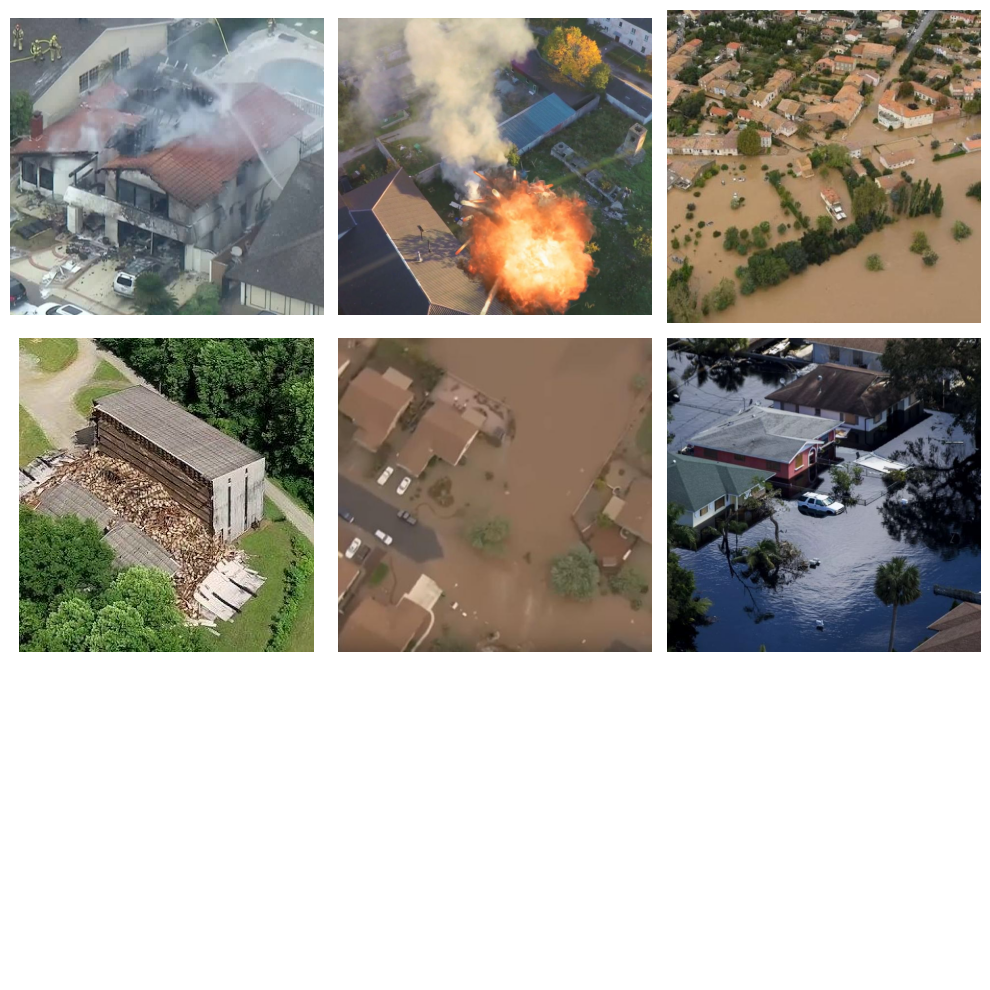

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# List of image paths
image_paths = [
    './images/_1.jpg',
    './images/_2.jpg',
    './images/_3.jpg',
    './images/_4.jpg',
    './images/_5.jpg',
    './images/_6.jpg'
]

# Define the size of the rectangle based on the number of images and their dimensions
num_images = len(image_paths)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a 3x3 grid of subplots

for i in range(num_images):
    img = Image.open(image_paths[i])
    row = i // 3
    col = i % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # Turn off axis labels for clarity

# Hide any empty subplots if there are fewer than 9 images
for j in range(num_images, 9):
    row = j // 3
    col = j % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
